<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/4_Std_dataset_initial_modelling_(all_simple_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Initial modelling (all simple models based on Std_dataset).ipynb


---

# LOAD LIBRARIES


In [1]:

!pip install tensorflow
!pip install scikeras

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Utilities
from datetime import datetime

# Machine Learning - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Metrics for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Deep Learning with Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Wrapper for Keras models

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
from scipy.stats import uniform, randint

# Suppress user warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from tabulate import tabulate

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

sns.set(style='white', context='notebook', palette='deep')

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
# Import required libraries
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor  # Ensemble Regressors
from xgboost import XGBRegressor  # XGBoost Regressor
from sklearn.neural_network import MLPRegressor  # Multi-layer Perceptron Regressor

# Metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Visualization and utility
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For summary table


# LOAD DATASET

In [3]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Define file path for 'Std_Datasetv5.csv'
file_path = os.path.join(subdirectory, 'Std_Datasetv5.csv')

# Check if the file exists, then load it as 'merged_dataset'
if os.path.exists(file_path):
    merged_dataset = pd.read_csv(file_path)
    print(f"[INFO] File 'Std_Datasetv5.csv' loaded successfully!")
    print(f"[INFO] DataFrame 'merged_dataset' shape: {merged_dataset.shape}")
    print(merged_dataset.head())  # Display the first few rows for verification
else:
    print(f"[ERROR] File 'Std_Datasetv5.csv' not found in '{subdirectory}'. Please check the file path.")

Mounted at /content/drive
[INFO] File 'Std_Datasetv5.csv' loaded successfully!
[INFO] DataFrame 'merged_dataset' shape: (72663, 71)
   saleable_area(ft^2)  unit_rate  floor  CPI   PC  IR  MW  M3  SD  UR  ...  \
0                  423      15792   22.0    0  351   3  18  17   0   3  ...   
1                  761      15857   12.0    0  351   3  18  17   0   3  ...   
2                  320      13717   12.0    0  351   3  18  17   0   3  ...   
3                  519      16541   29.0    0  351   3  18  17   0   3  ...   
4                  699      14721   24.0    0  351   3  18  17   0   3  ...   

   floor_height_floor_16to18  floor_height_floor_19to20  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   floor_height_floor_21to25  floor_he

# OPTION 2 - STD_DATASET


In [4]:
# Define the feature matrix (X) and target variables (y)

features = merged_dataset.drop(columns=['new_price', 'PC'])
target_Std = merged_dataset[['new_price', 'PC']]

X = features.copy()
y = target_Std.copy()

In [5]:
features.head()

,saleable_area(ft^2),unit_rate,floor,CPI,IR,MW,M3,SD,UR,GDP,...,floor_height_floor_16to18,floor_height_floor_19to20,floor_height_floor_21to25,floor_height_floor_26to30,floor_height_floor_31to35,floor_height_floor_36to40,floor_height_floor_41to45,floor_height_floor_46to50,floor_height_floor_above50,floor_height_floor_house03
0,423,15792,22.0,0,3,18,17,0,3,90,...,0,0,1,0,0,0,0,0,0,0
1,761,15857,12.0,0,3,18,17,0,3,90,...,0,0,0,0,0,0,0,0,0,0
2,320,13717,12.0,0,3,18,17,0,3,90,...,0,0,0,0,0,0,0,0,0,0
3,519,16541,29.0,0,3,18,17,0,3,90,...,0,0,0,1,0,0,0,0,0,0
4,699,14721,24.0,0,3,18,17,0,3,90,...,0,0,1,0,0,0,0,0,0,0


In [6]:
target_Std.head()

,new_price,PC
0,6680016,351
1,12067177,351
2,4389440,351
3,8584779,351
4,10289979,351


In [7]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target_Std, test_size=0.3, random_state=42)

# Print the shapes of the datasets
print("Shapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the datasets:
X_train shape: (50864, 69)
X_test shape: (21799, 69)
y_train shape: (50864, 2)
y_test shape: (21799, 2)


In [8]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'PC', 'IR', 'MW',
       'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS',
       'new_price', 'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long Dist

# INITIAL MODELLING

Initialized a new master results table.

Training models for target variable: new_price

MODEL: Linear Regression
Train R² Score: 0.630
Test R² Score: 0.628
Mean Absolute Error (MAE): 0.489
Mean Squared Error (MSE): 0.374
Root Mean Squared Error (RMSE): 0.611
Mean Absolute Percentage Error (MAPE): 249.308%
Performance Classification: Normal

MODEL: Random Forest Regressor
Train R² Score: 0.973
Test R² Score: 0.824
Mean Absolute Error (MAE): 0.282
Mean Squared Error (MSE): 0.177
Root Mean Squared Error (RMSE): 0.420
Mean Absolute Percentage Error (MAPE): 138.905%
Performance Classification: Normal

MODEL: XGBoost Regressor
Train R² Score: 0.827
Test R² Score: 0.766
Mean Absolute Error (MAE): 0.366
Mean Squared Error (MSE): 0.235
Root Mean Squared Error (RMSE): 0.485
Mean Absolute Percentage Error (MAPE): 173.392%
Performance Classification: Normal

MODEL: Gradient Boosting Regressor
Train R² Score: 0.770
Test R² Score: 0.746
Mean Absolute Error (MAE): 0.384
Mean Squared Error (MSE): 0.2

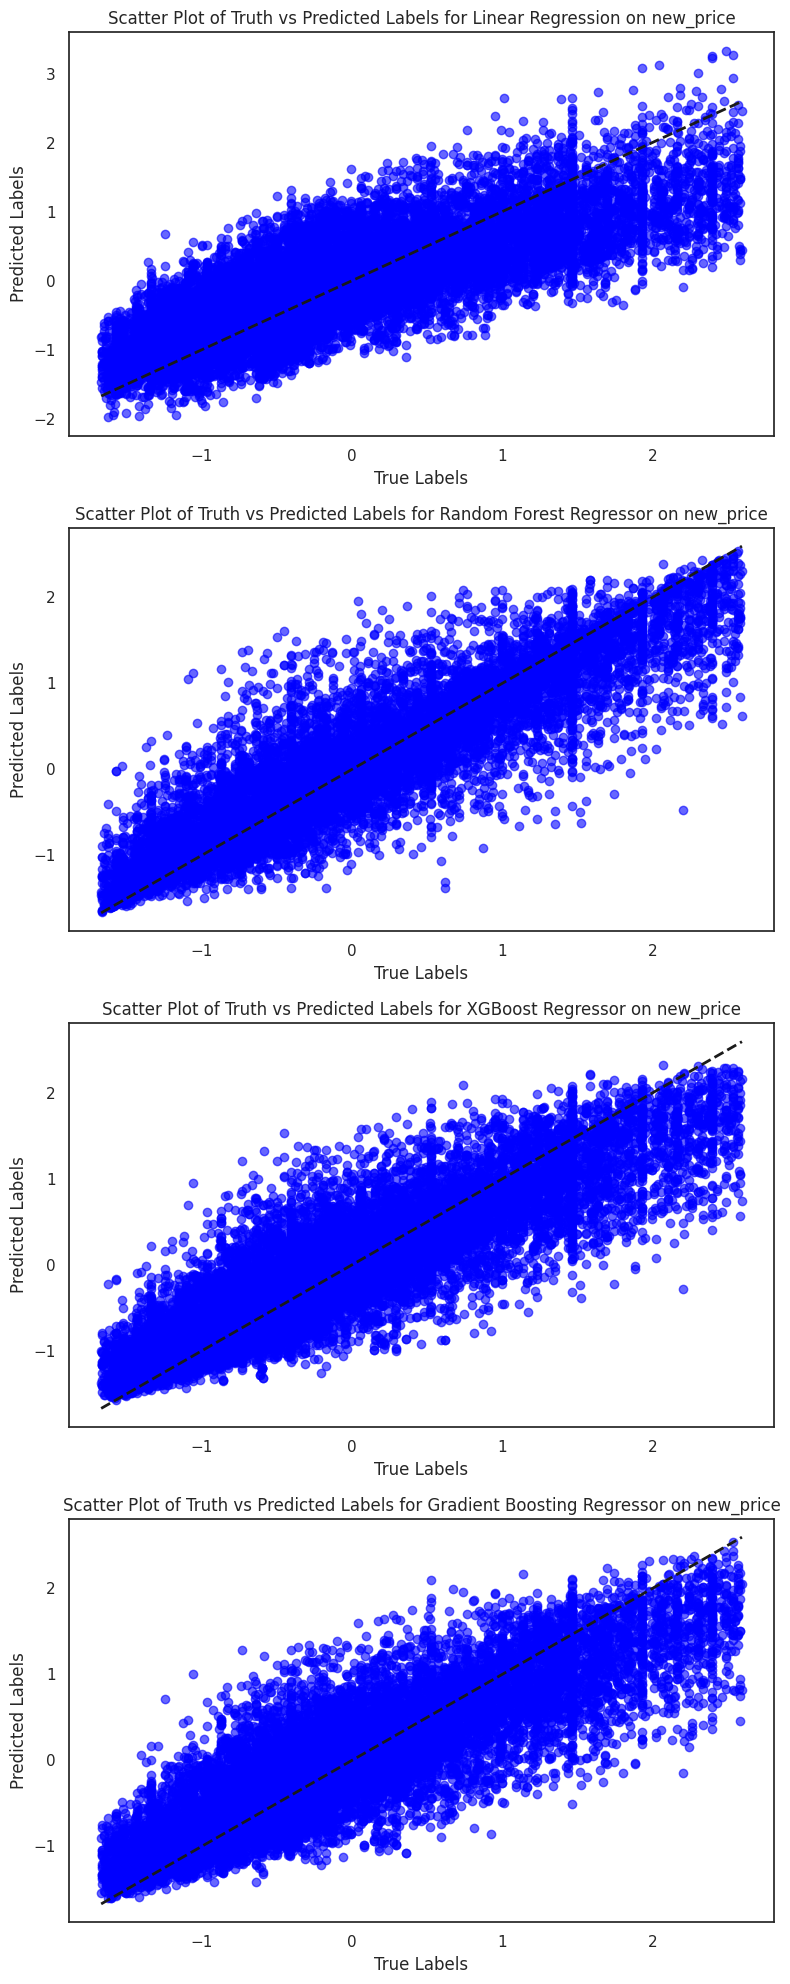

[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
      Target                        Model  Train R²   Test R²       MAE  \
0  new_price            Linear Regression  0.629738  0.627819  0.489318   
1  new_price      Random Forest Regressor  0.973290  0.824091  0.282348   
2  new_price            XGBoost Regressor  0.827007  0.766067  0.365720   
3  new_price  Gradient Boosting Regressor  0.769928  0.746053  0.383921   

        MSE      RMSE        MAPE Comments  
0  0.373920  0.611490  249.308212   Normal  
1  0.176731  0.420393  138.904649   Normal  
2  0.235026  0.484795  173.392079   Normal  
3  0.255134  0.505108  194.961371   Normal  


In [9]:
# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


# Define the feature exclusion list
excluded_features = [
    'unit_rate'
]

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['new_price', 'PC'])  # Drop target columns
features = features[[col for col in features.columns if col not in excluded_features]]  # Exclude specific features
target_Std = merged_dataset[['new_price']]  # Include target variables

X = features.copy()
y = target_Std.copy()

# Initialize scalers for features and targets
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale the features and targets
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Ensure y_train and y_test are numpy arrays
y_train = y_train if isinstance(y_train, np.ndarray) else y_train.to_numpy()
y_test = y_test if isinstance(y_test, np.ndarray) else y_test.to_numpy()

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),  # Type: Linear Model, Traditional Machine Learning
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),  # Type: Ensemble (Bagging, Tree-Based), Tree-Based Model
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),  # Type: Ensemble (Boosting, Tree-Based), Tree-Based Model
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)  # Type: Ensemble (Boosting, Tree-Based), Tree-Based Model
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load the master results table if it exists, otherwise create an empty DataFrame
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(
        np.abs((y_test.flatten() - test_prediction.flatten()) /
               np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classification of model performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments  # Add classification comments
    }

# Evaluate models for `new_price` only
target_name = "new_price"
new_results = []  # Store new results for the target

print(f"\n{'='*125}")
print(f"Training models for target variable: {target_name}")
print(f"{'='*125}")

# Extract the target column from y_train and y_test
y_train_target = y_train[:, target_Std.columns.get_loc(target_name)]  # Extract the target column
y_test_target = y_test[:, target_Std.columns.get_loc(target_name)]    # Extract the target column

# Create a figure for scatter plots
num_models = len(models)
fig, axes = plt.subplots(num_models, 1, figsize=(8, 5 * num_models))  # One row for each model

# Loop through regressors
for i, (regressor, model_name) in enumerate(zip(regressors, models)):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train, X_test, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics and classification
    print(f"Train R² Score: {metrics['Train R²']:.3f}")
    print(f"Test R² Score: {metrics['Test R²']:.3f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")
    print(f"Performance Classification: {metrics['Comments']}")  # Print the classification

    # Generate scatter plot for truth vs predicted labels in the corresponding subplot
    ax = axes[i]  # Select the subplot
    ax.scatter(y_test_target, regressor.predict(X_test), alpha=0.6, color='blue')
    ax.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
    ax.set_title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

# Adjust layout for better visualization
plt.tight_layout()

# Save the full plot as a single image
plt.savefig(f"all_models_scatter_{target_name}.png")
plt.show()

# Update the master results table
if new_results:
    # Remove existing rows for the current target to ensure overwriting
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]

    # Add the new results to the table
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)

    # Save the updated master results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

In [10]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'PC', 'IR', 'MW',
       'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS',
       'new_price', 'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long Dist

Loaded existing master results table from 'master_resultsStd.csv'.

Training models for target variable: PC

MODEL: Linear Regression
Train R² Score: 0.991
Test R² Score: 0.991
Mean Absolute Error (MAE): 0.071
Mean Squared Error (MSE): 0.009
Root Mean Squared Error (RMSE): 0.093
Mean Absolute Percentage Error (MAPE): 27.418%
Performance Classification: Normal

MODEL: Random Forest Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%
Performance Classification: Normal

MODEL: XGBoost Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.006
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.007
Mean Absolute Percentage Error (MAPE): 0.656%
Performance Classification: Normal

MODEL: Gradient Boosting Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared E

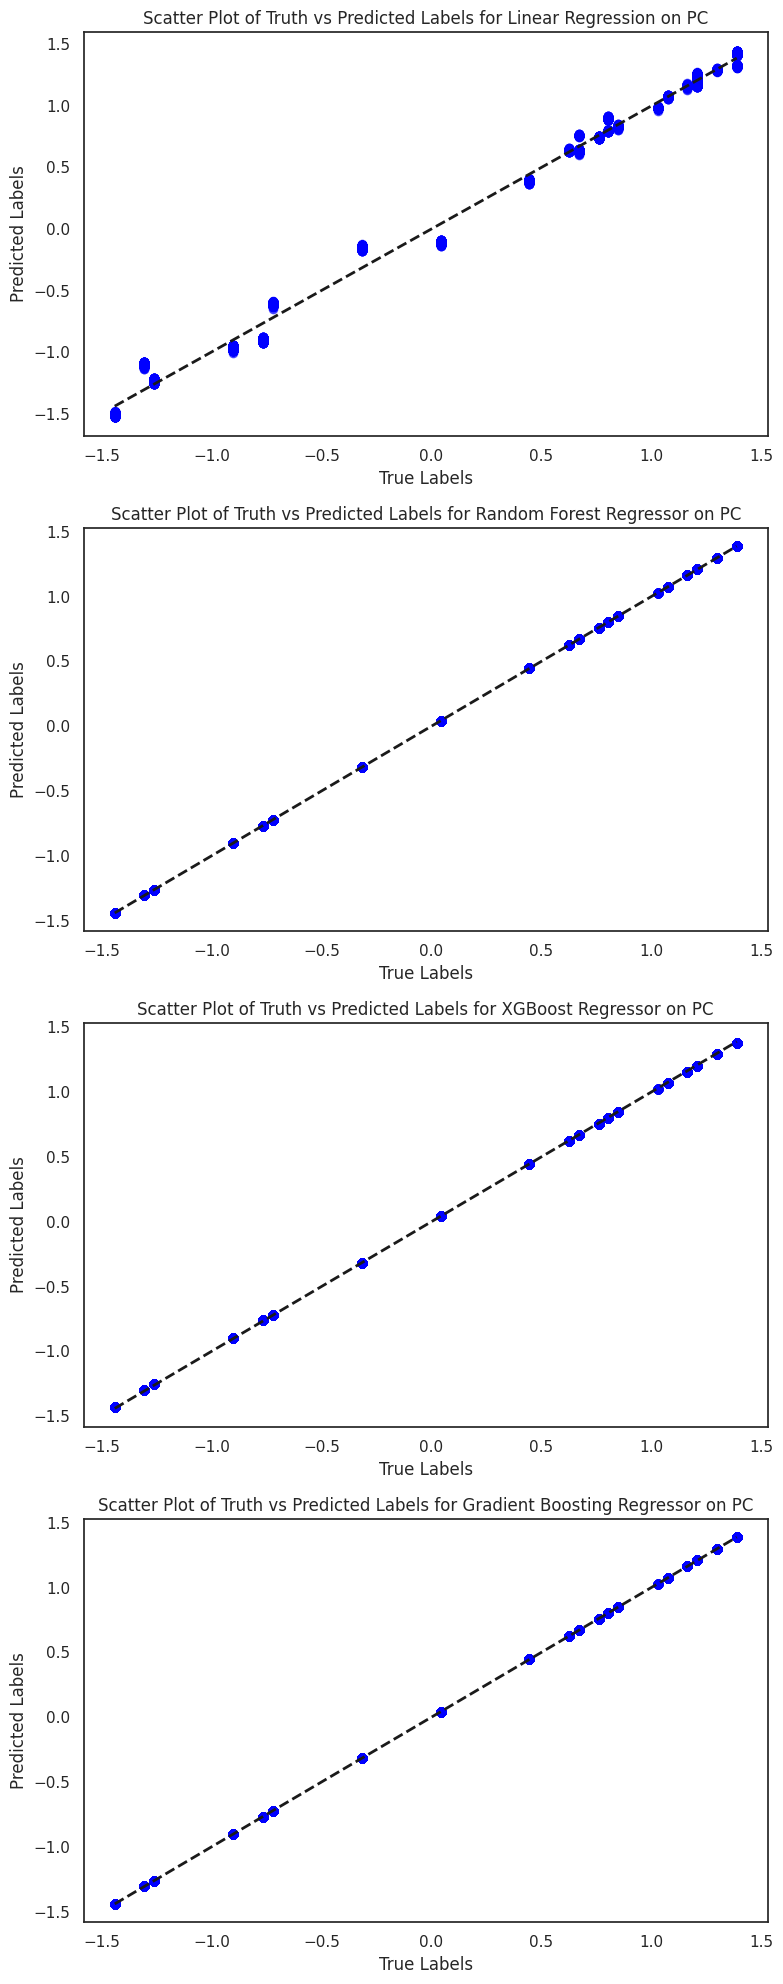

[INFO] Master results table updated and saved to 'master_resultsStd.csv'.

Updated Master Results Table:
      Target                        Model  Train R²   Test R²           MAE  \
0  new_price            Linear Regression  0.629738  0.627819  4.893183e-01   
1  new_price      Random Forest Regressor  0.973290  0.824091  2.823479e-01   
2  new_price            XGBoost Regressor  0.827007  0.766067  3.657201e-01   
3  new_price  Gradient Boosting Regressor  0.769928  0.746053  3.839207e-01   
4         PC            Linear Regression  0.991288  0.991369  7.136733e-02   
5         PC      Random Forest Regressor  1.000000  1.000000  1.651802e-14   
6         PC            XGBoost Regressor  0.999957  0.999957  6.098302e-03   
7         PC  Gradient Boosting Regressor  1.000000  1.000000  1.247346e-08   

            MSE          RMSE          MAPE Comments  
0  3.739195e-01  6.114896e-01  2.493082e+02   Normal  
1  1.767307e-01  4.203935e-01  1.389046e+02   Normal  
2  2.350260e-01  4

In [11]:
# TEST
# Function to classify model performance
def classify_performance(train_r2, test_r2):
    """
    Classify the performance of a model based on Train R² and Test R² scores.
    """
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


# Define the feature exclusion list
excluded_features = [
    'unit_rate'
]

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['new_price', 'PC'])  # Drop target columns
features = features[[col for col in features.columns if col not in excluded_features]]  # Exclude specific features
target_Std = merged_dataset[['PC']]  # Include target variables

X = features.copy()
y = target_Std.copy()

# Initialize scalers for features and targets
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale the features and targets
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Ensure y_train and y_test are numpy arrays
y_train = y_train if isinstance(y_train, np.ndarray) else y_train.to_numpy()
y_test = y_test if isinstance(y_test, np.ndarray) else y_test.to_numpy()

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),  # Type: Linear Model, Traditional Machine Learning
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),  # Type: Ensemble (Bagging, Tree-Based), Tree-Based Model
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),  # Type: Ensemble (Boosting, Tree-Based), Tree-Based Model
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)  # Type: Ensemble (Boosting, Tree-Based), Tree-Based Model
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load the master results table if it exists, otherwise create an empty DataFrame
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(
        np.abs((y_test.flatten() - test_prediction.flatten()) /
               np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classification of model performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments  # Add classification comments
    }

# Evaluate models for `new_price` only
target_name = "PC"
new_results = []  # Store new results for the target

print(f"\n{'='*125}")
print(f"Training models for target variable: {target_name}")
print(f"{'='*125}")

# Extract the target column from y_train and y_test
y_train_target = y_train[:, target_Std.columns.get_loc(target_name)]  # Extract the target column
y_test_target = y_test[:, target_Std.columns.get_loc(target_name)]    # Extract the target column

# Create a figure for scatter plots
num_models = len(models)
fig, axes = plt.subplots(num_models, 1, figsize=(8, 5 * num_models))  # One row for each model

# Loop through regressors
for i, (regressor, model_name) in enumerate(zip(regressors, models)):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train, X_test, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics and classification
    print(f"Train R² Score: {metrics['Train R²']:.3f}")
    print(f"Test R² Score: {metrics['Test R²']:.3f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")
    print(f"Performance Classification: {metrics['Comments']}")  # Print the classification

    # Generate scatter plot for truth vs predicted labels in the corresponding subplot
    ax = axes[i]  # Select the subplot
    ax.scatter(y_test_target, regressor.predict(X_test), alpha=0.6, color='blue')
    ax.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
    ax.set_title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

# Adjust layout for better visualization
plt.tight_layout()

# Save the full plot as a single image
plt.savefig(f"all_models_scatter_{target_name}.png")
plt.show()

# Update the master results table
if new_results:
    # Remove existing rows for the current target to ensure overwriting
    master_resultsStd = master_resultsStd[master_resultsStd["Target"] != target_name]

    # Add the new results to the table
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)

    # Save the updated master results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

In [12]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'floor', 'CPI', 'PC', 'IR', 'MW',
       'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS',
       'new_price', 'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 'district_Tuen Mun District',
       'district_Wan Chai District', 'district_Yuen Long Dist

In [13]:
# BASE ALL MODELS FOR PC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the feature exclusion list
excluded_features = [
    'SD', 'LTV', 'district_Central and Western District',
    'district_HKIsland Eastern District', 'district_HKIsland Southern District',
    'district_Kowloon Kowloon City District', 'district_Kowloon Kwun Tong District',
    'district_Kowloon Sham Shui Po District', 'district_Kowloon Wong Tai Sin District',
    'district_Kowloon Yau Tsim Mong District', 'district_Kwai Tsing District',
    'district_New Territories East Long Ping Estate',
    'district_New Territories East North District',
    'district_New Territories East Sha Tin District',
    'district_New Territories East Tai Po District',
    'district_New Territories West Islands District', 'district_Tsuen Wan District',
    'district_Tuen Mun District', 'district_Wan Chai District', 'district_Yuen Long District',
    'region_HK', 'region_KLN', 'region_NTEast', 'region_NTWest',
    'floor_size_compact600800', 'floor_size_large10001300',
    'floor_size_medium8001000', 'floor_size_micro200400',
    'floor_size_nano0200', 'floor_size_small400600', 'YearQuarter_2021Q1',
    'YearQuarter_2021Q2', 'YearQuarter_2021Q3', 'YearQuarter_2021Q4',
    'YearQuarter_2022Q1', 'YearQuarter_2022Q2', 'YearQuarter_2022Q3',
    'YearQuarter_2022Q4', 'YearQuarter_2023Q1', 'floor_height_floor_03to05',
    'floor_height_floor_06to08', 'floor_height_floor_09to10',
    'floor_height_floor_11to13', 'floor_height_floor_14to15',
    'floor_height_floor_16to18', 'floor_height_floor_19to20',
    'floor_height_floor_21to25', 'floor_height_floor_26to30',
    'floor_height_floor_31to35', 'floor_height_floor_36to40',
    'floor_height_floor_41to45', 'floor_height_floor_46to50',
    'floor_height_floor_above50', 'floor_height_floor_house03',
    'saleable_area(ft^2)', 'unit_rate'
]

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['new_price', 'PC'])  # Drop target columns
features = features[[col for col in features.columns if col not in excluded_features]]  # Exclude specific features
target_Std = merged_dataset[['PC']]  # Include target variables

X = features.copy()
y = target_Std.copy()

# Initialize scalers for features and targets
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale the features and targets
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load the master results table if it exists, otherwise create an empty DataFrame
if os.path.exists(MASTER_RESULTS_FILE):
    master_resultsStd = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_resultsStd = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to classify model performance
def classify_performance(train_r2, test_r2):
    if train_r2 < 0.6 and test_r2 < 0.6:
        return "Underfitting"
    elif train_r2 > 0.9 and test_r2 < 0.7:
        return "Overfitting"
    else:
        return "Normal"

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train.flatten())  # Flatten target array for compatibility
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(
        np.abs((y_test.flatten() - test_prediction.flatten()) /
               np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Classify performance
    comments = classify_performance(train_r2_score, test_r2_score)

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comments
    }

# Evaluate models for `PC` only
new_results = []  # Store new results
target_name = "PC"

print(f"\n{'='*125}")
print(f"Training models for target variable: {target_name}")
print(f"{'='*125}")

# Extract `PC` column from y_train and y_test
y_train_target = y_train[:, target_Std.columns.get_loc(target_name)]  # Extract the target column for `PC`
y_test_target = y_test[:, target_Std.columns.get_loc(target_name)]    # Extract the target column for `PC`

# Loop through regressors
for regressor, model_name in zip(regressors, models):
    print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

    # Evaluate the model and collect the results
    metrics = evaluate_model(regressor, model_name, X_train, X_test, y_train_target, y_test_target, target_name)
    new_results.append(metrics)

    # Display metrics
    print(metrics)

# Update the master results table
if new_results:
    # Remove rows for the current target (`PC`) and models
    master_resultsStd = master_resultsStd[~((master_resultsStd["Target"] == target_name) &
                                            (master_resultsStd["Model"].isin(models)))]

    # Add the new results to the table
    master_resultsStd = pd.concat([master_resultsStd, pd.DataFrame(new_results)], ignore_index=True)

    # Save the updated master results table
    master_resultsStd.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_resultsStd)

Loaded existing master results table from 'master_resultsStd.csv'.

Training models for target variable: PC

MODEL: Linear Regression
{'Target': 'PC', 'Model': 'Linear Regression', 'Train R²': 0.973660068974925, 'Test R²': 0.9740819765369214, 'MAE': 0.13177714682169023, 'MSE': 0.025914563097737722, 'RMSE': 0.1609800083791081, 'MAPE': 29.441769099960908, 'Comments': 'Normal'}

MODEL: Random Forest Regressor
{'Target': 'PC', 'Model': 'Random Forest Regressor', 'Train R²': 1.0, 'Test R²': 1.0, 'MAE': 1.6651551560501206e-14, 'MSE': 4.991350358425817e-28, 'RMSE': 2.234133021649744e-14, 'MAPE': 1.7071746212814943e-12, 'Comments': 'Normal'}

MODEL: XGBoost Regressor
{'Target': 'PC', 'Model': 'XGBoost Regressor', 'Train R²': 0.9999566580170175, 'Test R²': 0.9999566480886105, 'MAE': 0.006098937946188637, 'MSE': 4.334612339215567e-05, 'RMSE': 0.006583777289076209, 'MAPE': 0.6560286895427835, 'Comments': 'Normal'}

MODEL: Gradient Boosting Regressor
{'Target': 'PC', 'Model': 'Gradient Boosting Re

In [14]:
master_resultsStd.head(20)


,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments
0,new_price,Linear Regression,0.629738,0.627819,4.893183e-01,3.739195e-01,6.114896e-01,2.493082e+02,Normal
1,new_price,Random Forest Regressor,0.973290,0.824091,2.823479e-01,1.767307e-01,4.203935e-01,1.389046e+02,Normal
2,new_price,XGBoost Regressor,0.827007,0.766067,3.657201e-01,2.350260e-01,4.847948e-01,1.733921e+02,Normal
3,new_price,Gradient Boosting Regressor,0.769928,0.746053,3.839207e-01,2.551336e-01,5.051075e-01,1.949614e+02,Normal
4,PC,Linear Regression,0.973660,0.974082,1.317771e-01,2.591456e-02,1.609800e-01,2.944177e+01,Normal
5,PC,Random Forest Regressor,1.000000,1.000000,1.665155e-14,4.991350e-28,2.234133e-14,1.707175e-12,Normal
6,PC,XGBoost Regressor,0.999957,0.999957,6.098938e-03,4.334612e-05,6.583777e-03,6.560287e-01,Normal
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.221103e-08,2.160188e-16,1.469758e-08,3.735057e-06,Normal


# BASE LSTM MODEL (using just 5 Epochs and a simple network to make sure it works as processing for full model with 50 epochs takes a long time)

In [15]:
# Check that data has been scaled
print("Feature scaling range (X):", X_train.min(), "to", X_train.max())
print("Target scaling range (y):", y_train.min(), "to", y_train.max())


Feature scaling range (X): -3.566382454282129 to 5.098318788576672
Target scaling range (y): -1.439628382880877 to 1.3882247101678467


In [16]:
# BASE LSTM
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# File path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_results = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_results = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Prepare features and targets
features = merged_dataset.drop(columns=["new_price", "PC"])  # Drop target columns from features
targets_Std = merged_dataset[["new_price", "PC"]]  # Targets include both `new_price` and `PC`

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scalers = {col: StandardScaler() for col in targets_Std.columns}

# Scale targets independently for each column
y_scaled = pd.DataFrame()
for col in targets_Std.columns:
    y_scaled[col] = target_scalers[col].fit_transform(targets_Std[[col]]).flatten()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Initialize a list to store new results
new_results = []

# Process each target variable
for target_name in targets_Std.columns:
    print(f"\n{'='*125}")
    print(f"Training LSTM model for target variable: {target_name}")
    print(f"{'='*125}")

    # Reshape data for LSTM
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_train_target = y_train[[target_name]].values
    y_test_target = y_test[[target_name]].values

    # Define LSTM architecture
    lstm_model = Sequential([
        LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.3),
        LSTM(32, activation="relu"),
        Dropout(0.3),
        Dense(1)
    ])
    lstm_model.compile(optimizer="adam", loss="mse")

    # Train the model
    lstm_model.fit(
        X_train_lstm,
        y_train_target,
        epochs=5,
        batch_size=32,
        verbose=1,
        validation_data=(X_test_lstm, y_test_target),
        callbacks=[early_stopping]
    )

    # Predictions and metrics
    train_prediction = lstm_model.predict(X_train_lstm)
    test_prediction = lstm_model.predict(X_test_lstm)

    # Inverse transform predictions and true values for metrics
    scaler_y = target_scalers[target_name]
    train_prediction_rescaled = scaler_y.inverse_transform(train_prediction)
    test_prediction_rescaled = scaler_y.inverse_transform(test_prediction)
    y_train_rescaled = scaler_y.inverse_transform(y_train_target)
    y_test_rescaled = scaler_y.inverse_transform(y_test_target)

    # Calculate metrics
    train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
    test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
    mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
    mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                              np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

    # Performance comments
    if train_r2_score - test_r2_score > 0.1:
        comment = "Overfitting"
    elif train_r2_score < 0.5 and test_r2_score < 0.5:
        comment = "Underfitting or Failing"
    elif test_r2_score > 0.75 and mape_val < 10:
        comment = "Working Well"
    else:
        comment = "Needs Improvement"

    # Store results for this target
    new_results.append({
        "Target": target_name,
        "Model": "Base LSTM",
        "Type": "Neural Network",
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comment
    })

# Update the master results table
if new_results:
    new_results_df = pd.DataFrame(new_results)

    # Remove old results for the same targets and model from the master table
    for target in new_results_df["Target"].unique():
        master_results = master_results[
            ~((master_results["Target"] == target) & (master_results["Model"] == "Base LSTM"))
        ]

    # Append the new results
    master_results = pd.concat([master_results, new_results_df], ignore_index=True)

    # Save the updated master results table
    master_results.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_results.to_string(index=False))

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.

Training LSTM model for target variable: new_price
Epoch 1/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2874 - val_loss: 0.0169
Epoch 2/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0514 - val_loss: 0.0056
Epoch 3/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0432 - val_loss: 0.0079
Epoch 4/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0415 - val_loss: 0.0061
Epoch 5/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0387 - val_loss: 0.0054
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Training LSTM model for target variable: PC
Epoch 1/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1723 - val_loss: 0.0036
Epoch 2/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0337 - val_loss: 0.0020
Epoch 3/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0312 - val_loss: 0.0021
Epoch 4/5
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 7s 4m

In [17]:
master_resultsStd.head(30)


,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments
0,new_price,Linear Regression,0.629738,0.627819,4.893183e-01,3.739195e-01,6.114896e-01,2.493082e+02,Normal
1,new_price,Random Forest Regressor,0.973290,0.824091,2.823479e-01,1.767307e-01,4.203935e-01,1.389046e+02,Normal
2,new_price,XGBoost Regressor,0.827007,0.766067,3.657201e-01,2.350260e-01,4.847948e-01,1.733921e+02,Normal
3,new_price,Gradient Boosting Regressor,0.769928,0.746053,3.839207e-01,2.551336e-01,5.051075e-01,1.949614e+02,Normal
4,PC,Linear Regression,0.973660,0.974082,1.317771e-01,2.591456e-02,1.609800e-01,2.944177e+01,Normal
5,PC,Random Forest Regressor,1.000000,1.000000,1.665155e-14,4.991350e-28,2.234133e-14,1.707175e-12,Normal
6,PC,XGBoost Regressor,0.999957,0.999957,6.098938e-03,4.334612e-05,6.583777e-03,6.560287e-01,Normal
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.221103e-08,2.160188e-16,1.469758e-08,3.735057e-06,Normal


# ENHANCED LSTM ADDING EPOCHS AND COMPLEXITY

[INFO] Loaded existing master results table from 'master_resultsStd.csv'.

Training Enhanced LSTM model for target variable: new_price
Epoch 1/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.4119 - val_loss: 0.0201
Epoch 2/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0923 - val_loss: 0.0092
Epoch 3/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.0808 - val_loss: 0.0123
Epoch 4/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0746 - val_loss: 0.0080
Epoch 5/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0712 - val_loss: 0.0091
Epoch 6/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0690 - val_loss: 0.0075
Epoch 7/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0689 - val_loss: 0.0071
Epoch 8/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0663 - val_loss: 0.0121
Epoch 9/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0664 - val_loss: 0.0104
Epoch 10/50
1817/1817 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.

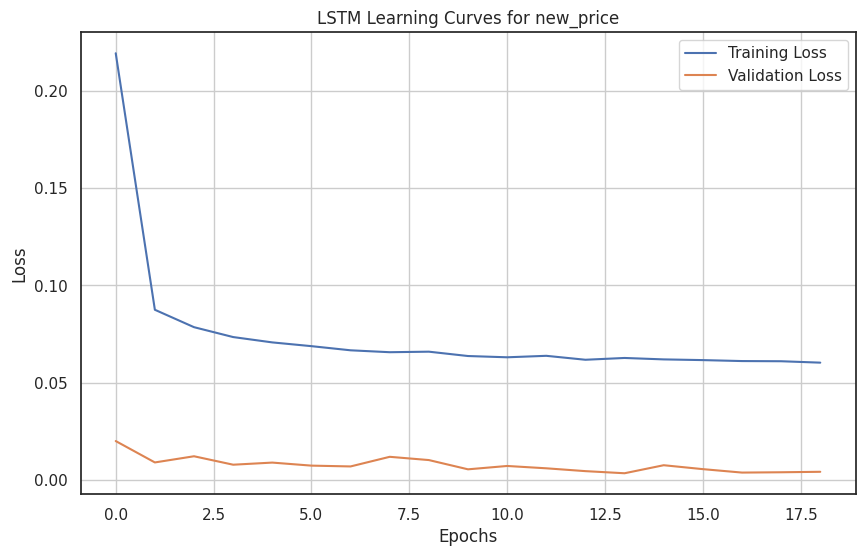

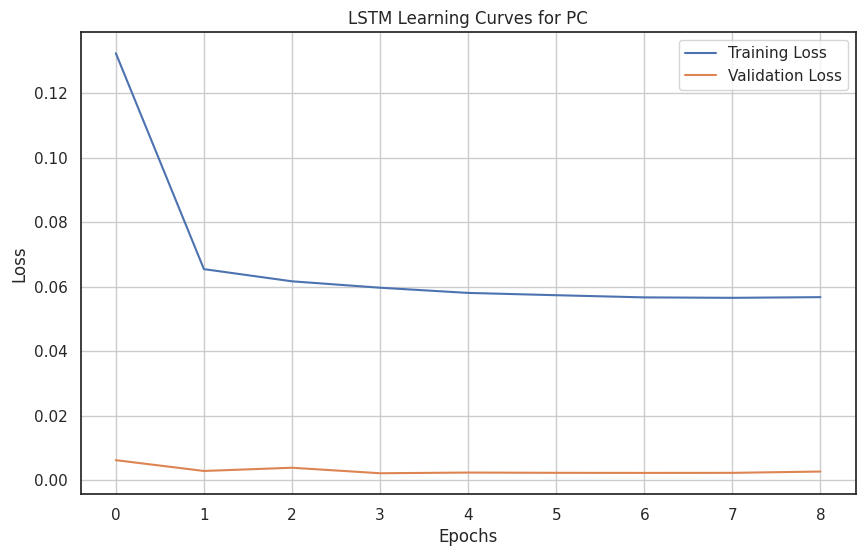


Updated Master Results Table:
   Target                       Model  Train R²  Test R²          MAE          MSE         RMSE         MAPE     Comments           Type
new_price           Linear Regression  0.629738 0.627819 4.893183e-01 3.739195e-01 6.114896e-01 2.493082e+02       Normal            NaN
new_price     Random Forest Regressor  0.973290 0.824091 2.823479e-01 1.767307e-01 4.203935e-01 1.389046e+02       Normal            NaN
new_price           XGBoost Regressor  0.827007 0.766067 3.657201e-01 2.350260e-01 4.847948e-01 1.733921e+02       Normal            NaN
new_price Gradient Boosting Regressor  0.769928 0.746053 3.839207e-01 2.551336e-01 5.051075e-01 1.949614e+02       Normal            NaN
       PC           Linear Regression  0.973660 0.974082 1.317771e-01 2.591456e-02 1.609800e-01 2.944177e+01       Normal            NaN
       PC     Random Forest Regressor  1.000000 1.000000 1.665155e-14 4.991350e-28 2.234133e-14 1.707175e-12       Normal            NaN
       PC 

In [18]:
# ENHANCED LSTM

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_resultsStd.csv"

# Load or initialize the master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_results = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_results = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Prepare features and targets
features = merged_dataset.drop(columns=["new_price", "PC"])  # Drop target columns
targets_Std = merged_dataset[["new_price", "PC"]]  # Include both `new_price` and `PC` as targets

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
target_scalers = {col: StandardScaler() for col in targets_Std.columns}

# Scale targets independently for each column
y_scaled = pd.DataFrame()
for col in targets_Std.columns:
    y_scaled[col] = target_scalers[col].fit_transform(targets_Std[[col]]).flatten()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Initialize a list to store new results
new_results = []

# Initialize a dictionary to store learning curves
learning_curves = {}

# Process each target variable
for target_name in targets_Std.columns:
    print(f"\n{'='*125}")
    print(f"Training Enhanced LSTM model for target variable: {target_name}")
    print(f"{'='*125}")

    # Reshape data for LSTM
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_train_target = y_train[[target_name]].values
    y_test_target = y_test[[target_name]].values

    # Define Enhanced LSTM architecture
    lstm_model = Sequential([
        LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.3),
        LSTM(32, activation="relu", return_sequences=True),
        Dropout(0.3),
        LSTM(16, activation="relu"),
        Dropout(0.3),
        Dense(1)
    ])
    lstm_model.compile(optimizer="adam", loss="mse")

    # Train the model
    history = lstm_model.fit(
        X_train_lstm,
        y_train_target,
        epochs=50,
        batch_size=32,
        verbose=1,
        validation_data=(X_test_lstm, y_test_target),
        callbacks=[early_stopping]
    )

    # Save training and validation loss to `learning_curves`
    learning_curves[target_name] = {
        "train_loss": history.history["loss"],
        "val_loss": history.history["val_loss"]
    }

    # Predictions and metrics
    train_prediction = lstm_model.predict(X_train_lstm)
    test_prediction = lstm_model.predict(X_test_lstm)

    # Inverse transform predictions and true values for metrics
    scaler_y = target_scalers[target_name]
    train_prediction_rescaled = scaler_y.inverse_transform(train_prediction)
    test_prediction_rescaled = scaler_y.inverse_transform(test_prediction)
    y_train_rescaled = scaler_y.inverse_transform(y_train_target)
    y_test_rescaled = scaler_y.inverse_transform(y_test_target)

    # Calculate metrics
    train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
    test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
    mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
    mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                              np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

    # Performance comments
    if train_r2_score - test_r2_score > 0.1:
        comment = "Overfitting"
    elif train_r2_score < 0.5 and test_r2_score < 0.5:
        comment = "Underfitting or Failing"
    elif test_r2_score > 0.75 and mape_val < 10:
        comment = "Working Well"
    else:
        comment = "Needs Improvement"

    # Store results for this target
    new_results.append({
        "Target": target_name,
        "Model": "Enhanced LSTM",
        "Type": "Neural Network",
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comment
    })

# Update the master results table
if new_results:
    new_results_df = pd.DataFrame(new_results)

    # Remove old results for the same targets and model from the master table
    for target in new_results_df["Target"].unique():
        master_results = master_results[
            ~((master_results["Target"] == target) & (master_results["Model"] == "Enhanced LSTM"))
        ]

    # Append the new results
    master_results = pd.concat([master_results, new_results_df], ignore_index=True)

    # Save the updated master results table
    master_results.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")

# Plot learning curves for all targets
for target_name, curves in learning_curves.items():
    plt.figure(figsize=(10, 6))
    plt.plot(curves["train_loss"], label="Training Loss")
    plt.plot(curves["val_loss"], label="Validation Loss")
    plt.title(f"LSTM Learning Curves for {target_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_results.to_string(index=False))

Loaded master_resultsStd.csv successfully! Shape: (12, 10)


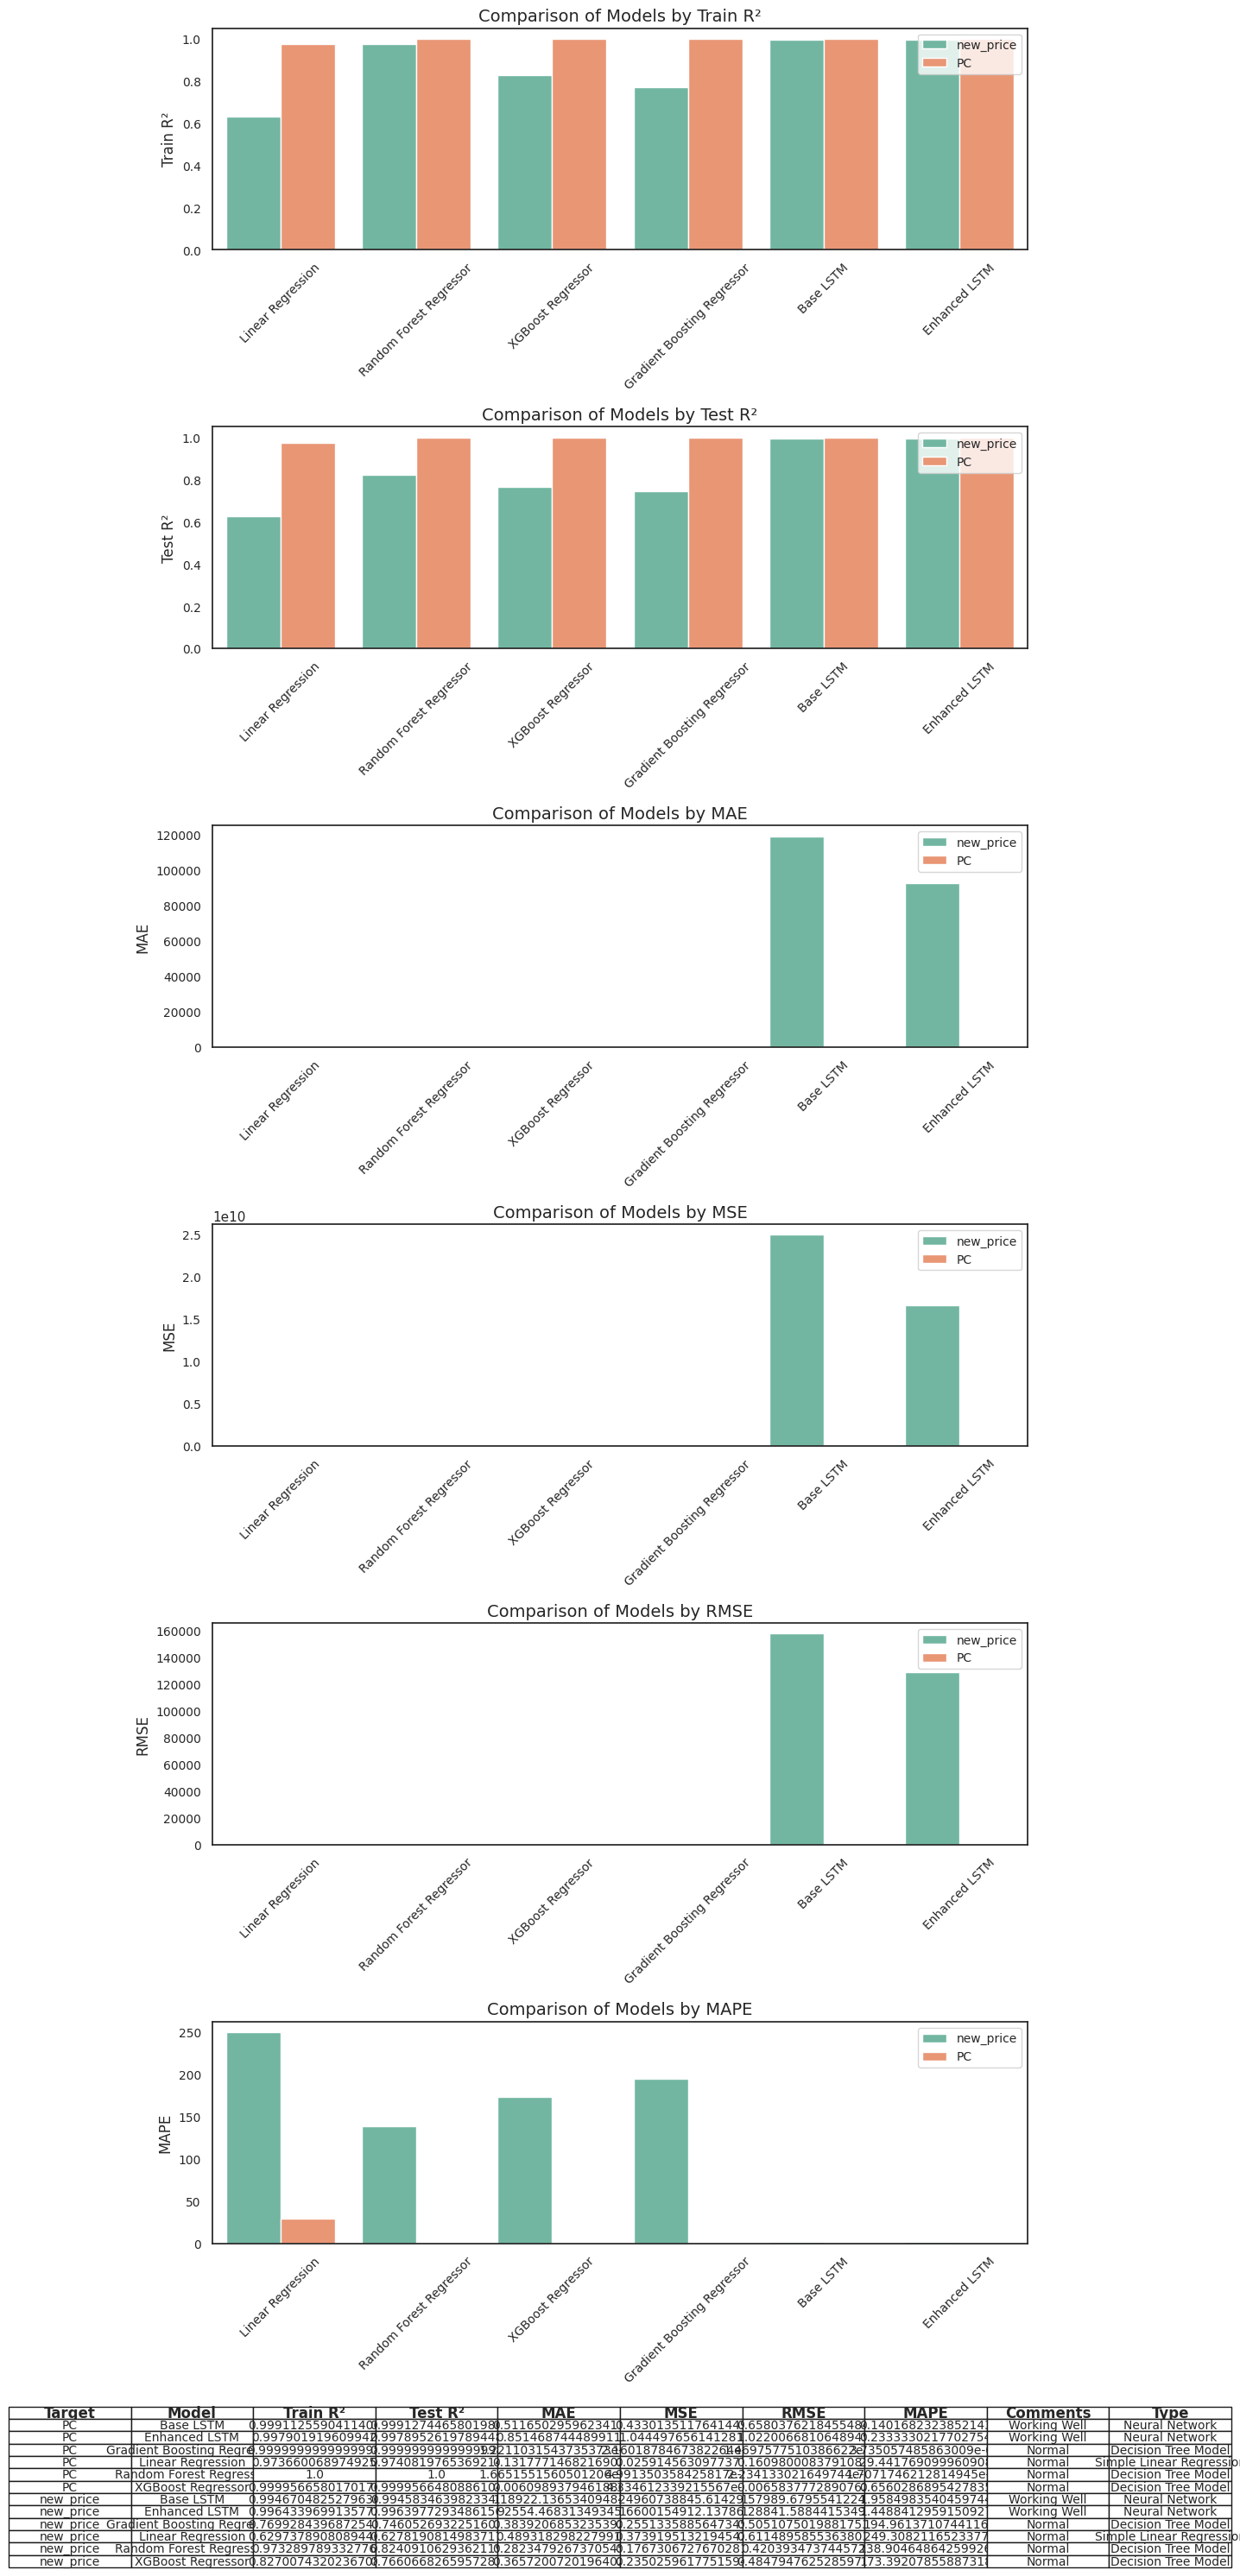

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot metrics and display results table
def plot_metrics_with_table(results_df, metrics):
    """
    Plot all metrics vertically and display the results as a table below the plots.

    :param results_df: DataFrame containing the evaluation results for models.
    :param metrics: List of metrics to plot.
    """
    # Replace NaN values in the "Type" column with specific descriptions
    results_df["Type"] = results_df.apply(
        lambda row: (
            "Simple Linear Regression" if row["Model"] == "Linear Regression" else
            "Neural Network" if "LSTM" in row["Model"] else
            "Decision Tree Model"
        ), axis=1
    )

    num_metrics = len(metrics)
    fig, axes = plt.subplots(num_metrics + 1, 1, figsize=(16, 5 * num_metrics),
                             gridspec_kw={"height_ratios": [1] * num_metrics + [0.6]})

    # Plot each metric
    for i, metric in enumerate(metrics):
        sns.barplot(
            ax=axes[i],
            data=results_df,
            x="Model",
            y=metric,
            hue="Target",
            palette="Set2"
        )
        axes[i].set_title(f"Comparison of Models by {metric}", fontsize=14)
        axes[i].set_ylabel(metric, fontsize=12)
        axes[i].set_xlabel("")
        axes[i].tick_params(axis="x", rotation=45, labelsize=10)
        axes[i].tick_params(axis="y", labelsize=10)
        axes[i].legend(fontsize=10, loc="upper right")

    # Plot the results table below the graphs
    axes[-1].axis("tight")
    axes[-1].axis("off")
    table_data = results_df[["Target", "Model"] + metrics + ["Comments", "Type"]].sort_values(by=["Target", "Model"])

    # Adjust font size and column width for the table
    table = axes[-1].table(
        cellText=table_data.values,
        colLabels=table_data.columns,
        loc="center",
        cellLoc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Adjust column widths for better alignment
    for key, cell in table.get_celld().items():
        if key[0] == 0:  # Header row
            cell.set_fontsize(12)
            cell.set_text_props(weight="bold")
        cell.set_width(0.15)  # Adjust column width

    # Adjust layout
    plt.subplots_adjust(hspace=0.5)  # Add space between plots and table
    plt.tight_layout()
    plt.show()

# Load the master_resultsStd DataFrame from CSV
try:
    master_resultsStd = pd.read_csv("master_resultsStd.csv")
    print(f"Loaded master_resultsStd.csv successfully! Shape: {master_resultsStd.shape}")
except FileNotFoundError:
    print("Error: master_resultsStd.csv not found. Make sure the file exists in the working directory.")
    exit()

# Define the list of metrics for plotting
metrics_to_plot = ["Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"]

# Plot metrics and display the table
plot_metrics_with_table(master_resultsStd, metrics_to_plot)

The analysis evaluates the performance of models for predicting `new_price` and `PC` using metrics such as `Train R²`, `Test R²`, `MAE`, `MSE`, `RMSE`, and `MAPE`. Linear Regression, categorized as "Simple Linear Regression," demonstrates decent accuracy but lags behind more advanced models. Decision Tree Models (e.g., Random Forest, Gradient Boosting, XGBoost) achieve near-perfect performance with high `R²` scores and minimal errors, making them highly effective for both targets. Neural Network models (`Base LSTM`, `Enhanced LSTM`) perform well, excelling particularly with `PC`. However, they exhibit slightly higher errors for `new_price`. Overall, Decision Tree Models dominate in predictive accuracy, while Neural Networks are better suited for capturing complex relationships, particularly for time series-like data.

# SAVING THE RESULTS

In [20]:
master_resultsStd.head(20)

,Target,Model,Train R²,Test R²,MAE,MSE,RMSE,MAPE,Comments,Type
0,new_price,Linear Regression,0.629738,0.627819,4.893183e-01,3.739195e-01,6.114896e-01,2.493082e+02,Normal,Simple Linear Regression
1,new_price,Random Forest Regressor,0.973290,0.824091,2.823479e-01,1.767307e-01,4.203935e-01,1.389046e+02,Normal,Decision Tree Model
2,new_price,XGBoost Regressor,0.827007,0.766067,3.657201e-01,2.350260e-01,4.847948e-01,1.733921e+02,Normal,Decision Tree Model
3,new_price,Gradient Boosting Regressor,0.769928,0.746053,3.839207e-01,2.551336e-01,5.051075e-01,1.949614e+02,Normal,Decision Tree Model
4,PC,Linear Regression,0.973660,0.974082,1.317771e-01,2.591456e-02,1.609800e-01,2.944177e+01,Normal,Simple Linear Regression
5,PC,Random Forest Regressor,1.000000,1.000000,1.665155e-14,4.991350e-28,2.234133e-14,1.707175e-12,Normal,Decision Tree Model
6,PC,XGBoost Regressor,0.999957,0.999957,6.098938e-03,4.334612e-05,6.583777e-03,6.560287e-01,Normal,Decision Tree Model
7,PC,Gradient Boosting Regressor,1.000000,1.000000,1.221103e-08,2.160188e-16,1.469758e-08,3.735057e-06,Normal,Decision Tree Model
8,new_price,Base LSTM,0.994670,0.994583,1.189221e+05,2.496074e+10,1.579897e+05,1.958498e+00,Working Well,Neural Network
9,PC,Base LSTM,0.999113,0.999127,5.116503e-01,4.330135e-01,6.580376e-01,1.401682e-01,Working Well,Neural Network


In [21]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame as 'Std_Datasetv5.csv'
file_path = os.path.join(subdirectory, 'Std_Datasetv5.csv')

# Save the DataFrame to the file path
try:
    merged_dataset.to_csv(file_path, index=False)
    print(f"[INFO] File 'Std_Datasetv5.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'merged_dataset' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'Std_Datasetv5.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv5.csv'.


In [22]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define file path for saving the DataFrame
file_path = os.path.join(subdirectory, 'master_resultsStd.csv')  # Change the filename

# Save the DataFrame to the file path
try:
    master_resultsStd.to_csv(file_path, index=False)
    print(f"[INFO] File 'master_resultsStd.csv' saved successfully at '{file_path}'.")
except NameError:
    print("[ERROR] The DataFrame 'master_resultsStd' does not exist. Please define it before saving.")
except Exception as e:
    print(f"[ERROR] An error occurred while saving the file: {e}")

Mounted at /content/drive
[INFO] File 'master_resultsStd.csv' saved successfully at '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/master_resultsStd.csv'.


In [23]:
merged_dataset.shape

(72663, 71)